# Analizing the Effect of interest Rates on bank stocks prices 15 days before and after the hike

### Import required Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numexpr

### Select the assets you want to analize and download their data

In [2]:
assetList=["NU","JPM","BAC","C","MS","GS"]

In [3]:
data=yf.download(
            tickers=assetList,
            period="1y",
            interval="1d",
            group_by ='ticker'
        )

[*********************100%***********************]  6 of 6 completed


### Make sure you downloaded the correct data

In [4]:
data

C                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2021-09-21  67.650002  67.739998  66.519997  66.940002  64.629387  21169900   
2021-09-22  67.889999  69.169998  67.790001  68.239998  65.884499  21160200   
2021-09-23  69.209999  71.389999  69.000000  70.879997  68.433380  21451500   
2021-09-24  70.709999  71.580002  70.709999  71.180000  68.723022  15788400   
2021-09-27  71.849998  72.610001  71.750000  72.260002  69.765755  19857500   
...               ...        ...        ...        ...        ...       ...   
2022-09-15  48.360001  49.250000  48.279999  48.439999  48.439999  16556900   
2022-09-16  47.990002  48.240002  47.470001  48.110001  48.110001  19988500   
2022-09-19  47.490002  48.480000  47.439999  48.240002  48.240002  14716100   
2022-09-20  47.820000  47.970001  46.860001  47.250000  47.250000  16649100   
2022-09-21  47.250000  47.540001  46.709999  47.285000  47.285000   6748978   

              NU                       ...         JPM              \
            Open   High   Low   Close  ...         Low       Close   
Date                                   ...                           
2021-09-21   NaN    NaN   NaN     NaN  ...  152.580002  152.979996   
2021-09-22   NaN    NaN   NaN     NaN  ...  155.100006  155.910004   
2021-09-23   NaN    NaN   NaN     NaN  ...  157.669998  161.179993   
2021-09-24   NaN    NaN   NaN     NaN  ...  160.820007  163.039993   
2021-09-27   NaN    NaN   NaN     NaN  ...  164.610001  166.979996   
...          ...    ...   ...     ...  ...         ...         ...   
2022-09-15  5.38  5.810  5.34  5.5100  ...  115.760002  117.870003   
2022-09-16  5.31  5.330  5.00  5.2800  ...  115.370003  117.080002   
2022-09-19  5.10  5.380  4.97  5.3300  ...  115.510002  118.160004   
2022-09-20  5.24  5.315  5.14  5.2200  ...  114.639999  115.830002   
2022-09-21  5.24  5.255  5.08  5.2518  ...  114.370102  115.329803   

                                        BAC                                   \
             Adj Close    Volume       Open       High        Low      Close   
Date                                                                           
2021-09-21  148.729797   8999900  39.270000  39.599998  38.939999  39.130001   
2021-09-22  151.578415  11236200  39.750000  40.520000  39.750000  40.139999   
2021-09-23  156.701981  12336100  40.759998  41.880001  40.650002  41.689999   
2021-09-24  158.510315  10102400  41.720001  42.340000  41.650002  42.139999   
2021-09-27  162.340866  13220900  42.680000  43.430000  42.639999  43.259998   
...                ...       ...        ...        ...        ...        ...   
2022-09-15  117.870003  10821400  33.790001  34.900002  33.700001  34.509998   
2022-09-16  117.080002  14840700  34.189999  34.230000  33.660000  34.119999   
2022-09-19  118.160004   8201300  33.720001  34.869999  33.630001  34.689999   
2022-09-20  115.830002   9617000  34.500000  34.779999  33.880001  34.169998   
2022-09-21  115.329803   3958734  34.310001  34.395000  33.709999  33.974998   

                                 
            Adj Close    Volume  
Date                             
2021-09-21  38.278942  38271100  
2021-09-22  39.266979  46261400  
2021-09-23  40.783264  49779800  
2021-09-24  41.223476  39042300  
2021-09-27  42.319118  49755400  
...               ...       ...  
2022-09-15  34.509998  44863300  
2022-09-16  34.119999  54235200  
2022-09-19  34.689999  29782000  
2022-09-20  34.169998  33577000  
2022-09-21  33.974998  15824608  

[253 rows x 36 columns]

### Filter data to get only the closing price of each day

In [5]:
data=data.fillna(0)
headers=data.columns.values.tolist()

for header in headers:
    if not header[1]==("Close"):
        data=data.drop(columns=header)
data
      

,C,NU,GS,MS,JPM,BAC
,Close,Close,Close,Close,Close,Close
Date,,,,,,
2021-09-21,66.940002,0.0000,375.839996,98.300003,152.979996,39.130001
2021-09-22,68.239998,0.0000,385.470001,100.800003,155.910004,40.139999
2021-09-23,70.879997,0.0000,391.859985,103.550003,161.179993,41.689999
2021-09-24,71.180000,0.0000,390.850006,102.910004,163.039993,42.139999
2021-09-27,72.260002,0.0000,399.809998,105.099998,166.979996,43.259998
...,...,...,...,...,...,...
2022-09-15,48.439999,5.5100,331.619995,88.260002,117.870003,34.509998
2022-09-16,48.110001,5.2800,326.209991,87.430000,117.080002,34.119999


### Graph data for a quick overview of the data you have

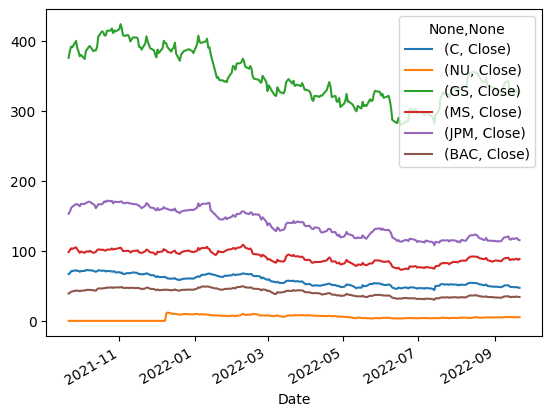

In [6]:
pricesPlot=data.plot.line()

### Code Function that gets the percentage difference of closing prices between the ranges given

This function take 4 arguments , first the data frame that contains all your filterd closing prices for the past year, second the first date in the range you want to evaluate, third the middle date of your range. finally the last date in your range. The function calculates the percentage difference between the first date and the middle date, and also the percentage difference between the middle date and the last date. The function returns a dateframe containing 2 percentage differences for each asset.

In [13]:
def getPercentageChanges(data,initialDate,middleDate,endingDate): 
    initialPrices=data.query("Date=='{}'".format(initialDate))
    pricesOnHikeDay=data.query("Date=='{}'".format(middleDate))
    finalPrices=data.query("Date=='{}'".format(endingDate))

    percentageChanges=pd.DataFrame(columns=["Asset","Percentage Change Before","Percentage change After"])

    for header in list(initialPrices):
        initialPrice=initialPrices[header].iloc[-1]
        priceOnHikeDay=pricesOnHikeDay[header].iloc[-1]
        finalPrice=finalPrices[header].iloc[-1]

        changeBeforeHike=((priceOnHikeDay-initialPrice)/initialPrice)*100
        changeAfterHike=((finalPrice-priceOnHikeDay)/priceOnHikeDay)*100



        row={"Asset":header[0],"Percentage Change Before":changeBeforeHike,"Percentage change After":changeAfterHike}
        percentageChanges=percentageChanges.append(row,ignore_index=True)
        
    return percentageChanges
    


### Use the the created function with the date range for the first interest hike

<AxesSubplot:title={'center':'Percentage Changes 15 before and After first interest Hike'}, xlabel='Asset', ylabel='Percentage Change'>

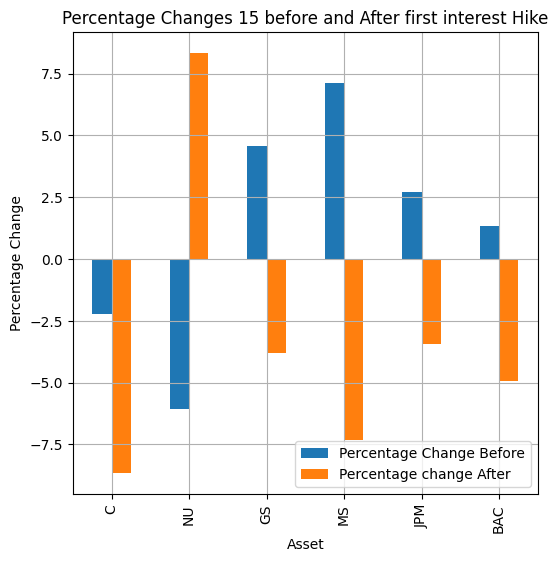

In [12]:
percentageChanges=getPercentageChanges(data,"2022-03-1","2022-03-17","2022-04-1")
percentageChanges.plot.bar(
    title="Percentage Changes 15 before and After first interest Hike",
    x="Asset",
    grid=True,
    xlabel="Asset",
    ylabel="Percentage Change",
    figsize=(6,6)
    
)

The graph shows how for each asset ,except for Nu bank , there was a percentage decrease in the price of the asset 15 days after the interest hike rate. With the exception of Nubank all the stocks performed worst after the price hike

### Use the the created function with the date range for the second interest hike

<AxesSubplot:title={'center':'Percentage Changes 15 before and After second interest Hike'}, xlabel='Asset', ylabel='Percentage Change'>

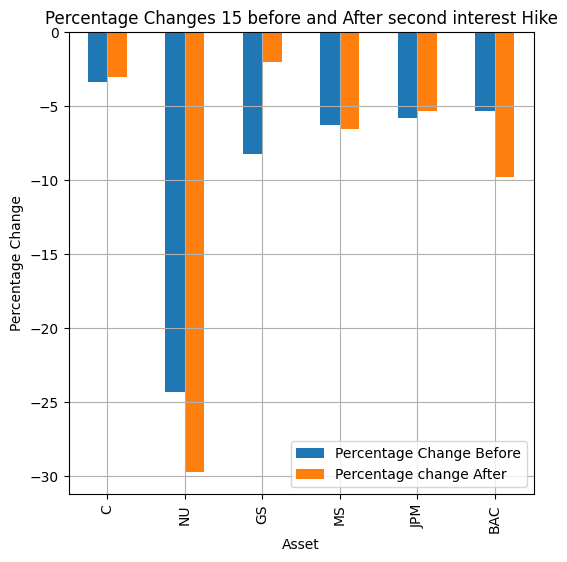

In [8]:
percentageChanges=getPercentageChanges(data,"2022-04-20","2022-05-5","2022-05-20")
percentageChanges.plot.bar(
    title="Percentage Changes 15 before and After second interest Hike",
    x="Asset",
    grid=True,
    xlabel="Asset",
    ylabel="Percentage Change",
    figsize=(6,6)
    
)

The graph above shows how within the range for the second interest hike , half of the stocks performed mostly the same 15 days before and 15 days after the hike following the same rate of downward trend. Goldman Sacks performed better after the hike with less percentage decrease. Bank of america perfomed worst after the hike.Nubank algo performed worst after the hike.

### Use the the created function with the date range for the third interest hike

<AxesSubplot:title={'center':'Percentage Changes 15 before and After Third interest Hike'}, xlabel='Asset', ylabel='Percentage Change'>

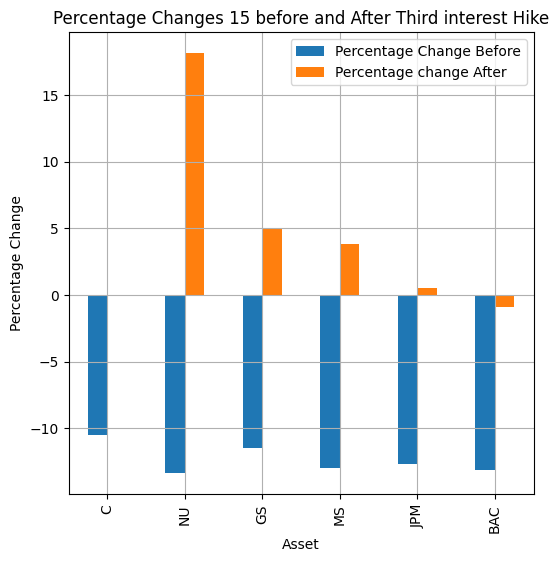

In [9]:
percentageChanges=getPercentageChanges(data,"2022-06-1","2022-06-16","2022-07-1") 
percentageChanges.plot.bar(
    title="Percentage Changes 15 before and After Third interest Hike",
    x="Asset",
    grid=True,
    xlabel="Asset",
    ylabel="Percentage Change",
    figsize=(6,6)
    
)

The graph above shows that all the stocks had way better results after the third interest rate hike. Most stocks had growth in the period after the hike , which represents a change in comparison with the seccond interest hike where some stocks has less percentage increase after the hike but the was still no percentage increase. This graph shows positive percentage increase in the price of the stocks , with the exception of Bank of America.

### Use the the created function with the date range for the third interest hike

<AxesSubplot:title={'center':'Percentage Changes 15 before and After fourth interest Hike'}, xlabel='Asset', ylabel='Percentage Change'>

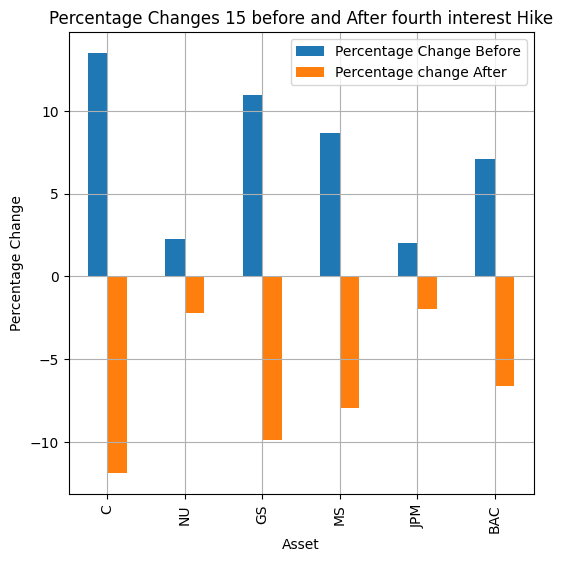

In [10]:
percentageChanges=getPercentageChanges(data,"2022-07-12","2022-07-27","2022-07-12") 
percentageChanges.plot.bar(
    title="Percentage Changes 15 before and After fourth interest Hike",
    x="Asset",
    grid=True,
    xlabel="Asset",
    ylabel="Percentage Change",
    figsize=(6,6)
    
)

The last graph shows that all the stocks erased the gain showed in the previous interest hike